# 🕵🏼 **4. Óra:** Differencia számítással megoldható feladatok

## 🎯 Küldetés  

- Ismétlés
- 5 feladat megoldása

---

## Hasznos linkek  
🔍 [Három különböző technika diszkrét kísérleti adatok numerikus deriváltjának kiszámítására Pythonban](https://youtu.be/9G16HYUgENo) 

### Ismétlés
**Definició (Deriválás diszkrét időben)**:

Legyen $ x[n] $ egy diszkrét időben definiált jel, és legyen $ \Delta t $ a mintavételezési idő. A diszkrét időbeli derivált vagy különbségi hányados a következőképpen definiálható:

$$
x'[n] = \frac{x[n] - x[n-1]}{\Delta t}
$$

Emlékezzünk, hogyan definiáltuk a differencia számító függvényt:
```python
def deriv(function, time_step):
    derivative = []
    for i in range(1, len(function)):
        derivative.append((function[i] - function[i-1]) / time_step)
    return derivative
```
---
#### Ha sikerült elsajátítani az előző alkalmon tanultakat, illetve néha benézegettünk G1/A1-re, felmerülhetnenk bennünk a következő kérdések:
- Ezzel a képlettel meg tudjuk határozni az adott jel/függvény/adatsor/... n. mintavételi pontjában a meredekséget, azaz a görbe érintőjét. Ez azt jelenti, hogy tulajdonképpen **meg tudjuk "jósolni" merre lesz kb. a következő adatpontunk**?

- "Le tudok tapogatni" egy ismeretlen görbét ezeknek a kicsi, lokális meredekségeknek a segítségével?

- Mi történik, ha a számítógépem által szabott határokig kicsinyítem ${\Delta t}$-t?

- Meg tudom határozni az irányokat, tehát ezek vektorok?? Milyen irányba mutatnak?

- Mennyi mindent tudok egy rendszerről azzal, hogy ismerem az állapotát különböző mintavételi pontokban? Mire lehet ezt használni a valóságban?

#### 🔭**Ezekre próbálunk választ találni a mai gyakorlaton!**


In [1]:
import numpy as np

def deriv(function, time_step):
    derivative = []
    for i in range(1, len(function)):
        derivative.append((function[i] - function[i-1]) / time_step)
    return derivative

## 1. Feladat: Hullócsillag útjának követése távcsővel 🌠🔭
Egy éjjel kiugrasz csillagokat nézni és magaddal viszed a távcsövedet. Egyszercsak észreveszel egy hullócsillagot, amely az égen mozog. A helyzetét rögzíted 5 másodpercenként, egy kis ideig még tudod követni, de hirtelen észreveszed, hogy a csillag már kimozdult a távcsöved látóteréből! A diszkrét különbségek segítségével meg tudod jósolni, hogy hová kell legközelebb irányítanod a távcsövedet? A távcsőbe 5 másodpercenként nézel bele, egészen addig, amíg fázni nem kezdesz 5 eltöltött perc után a hideg éjszakában.

a) Mi a csillag következő helyzete?

[0.4, 0.4, 0.4]
[-0.029999999999999992, -0.03000000000000001, -0.02999999999999998]


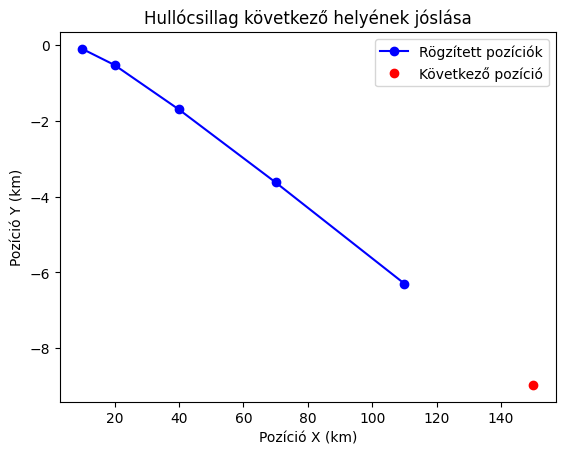

In [2]:
import matplotlib.pyplot as plt

# Időlépés [s]
delta_t = 5

# Feljegyzett pozíciói a csillagnak
x_positions = [10, 20, 40, 70, 110]  # Egyre gyorsul
y_positions = [-0.1, -0.525, -1.7, -3.625, -6.3]  # Átlósan halad

# Sebesség számítása mind x mind y irányban
vx = deriv(x_positions, delta_t)
vy = deriv(y_positions, delta_t)

# a_x, x irányú gyorsulás:
ax = deriv(vx, delta_t)
print(ax) # konstans kb

# a_y, y irányú gyorsulás:
ay = deriv(vy, delta_t)
print(ay) # konstans kb

# Következő pozíció számítása
next_x = x_positions[-1] + vx[-1] * delta_t
next_y = y_positions[-1] + vy[-1] * delta_t

# Kirajzolás
plt.plot(x_positions, y_positions, 'bo-', label='Rögzített pozíciók')
plt.plot(next_x, next_y, 'ro', label='Következő pozíció')
plt.xlabel('Pozíció X (km)')
plt.ylabel('Pozíció Y (km)')
plt.legend()
plt.title('Hullócsillag következő helyének jóslása')
plt.show()


b) Hogy fog kinézni a pályája, amíg kint tartózkodsz? Hány darab adatpontod lesz?

In [3]:
# Utolsó feljegyzett értékek a sebesség és a gyorsulás esetén
vx_last = vx[-1]
vy_last = vy[-1]
ax_last = ax[-1]
ay_last = ay[-1]

num_predictions = 60 # 5 perc alatt hány adatpont
predicted_x = [x_positions[-1]]
predicted_y = [y_positions[-1]]

for _ in range(num_predictions):
    new_x =  predicted_x[-1] + vx_last*delta_t + ax_last*0.5*delta_t**2 # képlet fizika óráról
    new_y = predicted_y[-1] + vy_last*delta_t + ay_last*0.5*delta_t**2
    predicted_x.append(new_x)
    predicted_y.append(new_y)
    
    # Sebesség frissítése a gyorsulás "deriválásával": a/delta_t
    vx_last += ax_last * delta_t
    vy_last += ay_last * delta_t


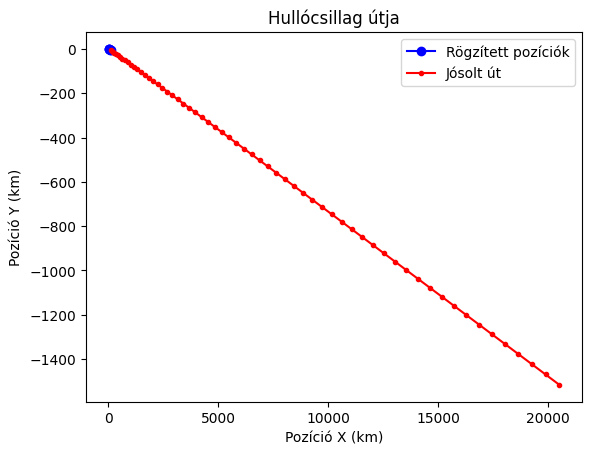

In [4]:
# Plot
plt.plot(x_positions, y_positions, 'bo-', label='Rögzített pozíciók')
plt.plot(predicted_x, predicted_y, 'r.-', label='Jósolt út')
plt.xlabel('Pozíció X (km)')
plt.ylabel('Pozíció Y (km)')
plt.legend()
plt.title('Hullócsillag útja')
plt.show()

#### Mit veszünk észre?

c) Hol lesz a csillag amikor hazaindulsz?

In [5]:
final_x = predicted_x[-1]
final_y = predicted_y[-1]

print(f"Hazainduláskor a hullócsillag várható pozíciója: ({final_x:.1f}, {final_y:.1f}) [km].")

Hazainduláskor a hullócsillag várható pozíciója: (20510.0, -1516.8) [km].


**Mi történik, ha nagyobb frekvenciával nézegetek bele a távcsőbe és jegyzem le a koordinátákat?** (Ez persze emberileg már nem lehetséges)

Érezzük hogy a prediktált görbe kevésbé fog "kiegyenesedni", jobban fogja közelíteni a valós mozgást.

## 2. Feladat: Δt csökkentésének hatása a diszkrét idejű deriváltra 🚀✨✨
Maradjunk a hullócsillagos példánál, a célunk a pozíciók minél pontosabb prediktálása, ehhez már szoftveres segítséget is igénybe veszünk, hogy lerövidíthessük a mintavételezési időt 1 másodpercre. A modellünk is legyen valóságosabb, a csillag gyorsulása nem konstans.


In [ ]:
# Új időlépés
delta_t = 1

num_predictions = 60 # 1 perc alatt hány adatpontunk lesz
predicted_x = [x_positions[-1]]
predicted_y = [y_positions[-1]]

# Utolsó feljegyzett értékek alapján a sebesség és a gyorsulás init ismét
vx_last = vx[-1]
vy_last = vy[-1]
ax_last = ax[-1]
ay_last = ay[-1]

# Időtől függő, változó gyorsulás modellezése
for t in range(1, num_predictions):
    # Szinuszos modell, hogy időben változó legyen a gyorsulás
    ax_last = 0.1 * np.sin(0.1 * t) # mindig máshonnan mintavételezünk egy szinusz görbéből
    ay_last = 0.1 * np.cos(0.1 * t)
    
    # Új pozíció
    new_x = predicted_x[-1] + vx_last*delta_t + ax_last*0.5*delta_t**2
    new_y = predicted_y[-1] + vy_last*delta_t + ay_last*0.5*delta_t**2

    # Számított értékek hozzáadása a jósolt értékek listáihoz:
    
    
    # Sebesség frissítése a gyorsulás "deriválásával": a/delta_t
    vx_last += ax_last * delta_t
    vy_last += ay_last * delta_t

# Plot
plt.plot(x_positions, y_positions, 'bo-', label='Rögzített pozíciók')
plt.plot(predicted_x, predicted_y, 'r.-', label='Jósolt út')
plt.xlabel('Pozíció X (km)')
plt.ylabel('Pozíció Y (km)')
plt.legend()
plt.title('Hullócsillag útja')
plt.show()


Vegyük észre a lényeget és hogy ezt hogyan tudjuk valós problémák megoldására használni!

## 3. Feladat: Szinusz görbe deriváltjának közelítése
Vegyünk egyre csökkenő Δt értékeket és vizsgáljuk meg, milyen pontosan vagyunk képesek megközelíteni a koszinusz görbét!

In [ ]:
import math

# Valós szinusz
def f(t):
    return math.sin(t)

# Valós koszinusz
def f_prime(t):
    return math.cos(t)

# Δt értékek
delta_ts = [0.5, 0.1, 0.01]

plt.figure(figsize=(8, 6))

# közelítés differenciákkal
for delta_t in delta_ts:
    time = [i * delta_t for i in range(int(2 * math.pi / delta_t))]
    x_values = [f(t) for t in time]
    x_deriv = deriv(x_values, delta_t) # gondoljunk a definícióra
    
    plt.plot(time[1:], x_deriv, 'o-', label=f'Δt = {delta_t}')

# Valós derivált
t_fine = [i * 0.01 for i in range(int(2 * math.pi / 0.01))]
plt.plot(t_fine, [f_prime(t) for t in t_fine], 'k-', label='Cos(t)')

plt.xlabel('Idő (s)')
plt.ylabel('Derivált')
plt.legend()
plt.title('Koszinusz közelítése')
plt.show()


## 4. Feladat: A diszkrét idejű deriváltak vektorként való értelmezése
Szemléltessük egy körpályán mozgó tárgy sebességvektorait! Honna tudom, merre mutat a vektor?

Kör készítése:

A kört **paraméteres egyenletének** kihasználásával készítjük el.  
Egy origó középpontú és 1 sugarú kör egyenlete:

$$
x = \cos(t)
$$

$$
y = \sin(t)
$$

ahol $ t $ az x tengellyel bezárt szög (radiánban), amely $ 0 $-tól $ 2\pi $-ig terjed.  
Ez azt jelenti, hogy:

- **$ \cos t $** határozza meg az $ x $-koordinátát.
- **$ \sin t $** határozza meg az $ y $-koordinátát.
- Ahogy $ t $ növekszik $ 0 $-tól $ 2\pi $-ig, az $(x, y)$ pontok az **egységkör** mentén mozognak az óramutató járásával ellentétes irányban.

## Geometriai jelentés

| Szög ($ t $) | $ x = \cos(t) $ | $ y = \sin(t) $ | Pont |
|--------------|----------------|----------------|------|
| $ 0 $ | $ 1 $ | $ 0 $ | $ (1,0) $ (jobb széle) |
| $ \pi/2 $| $ 0 $ | $ 1 $ | $ (0,1) $ (teteje) |
| $ \pi $ | $ -1 $ | $ 0 $ | $ (-1,0) $ (bal széle) |
| $ 3\pi/2 $ | $ 0 $ | $ -1 $ | $ (0,-1) $ (alja) |
| $ 2\pi $ | $ 1 $ | $ 0 $ | $ (1,0) $ (visszatér a kiindulópontra) |

In [ ]:
# Időlépés
delta_t = 0.1
time = [i * delta_t for i in range(int(2 * math.pi / delta_t))] # 1 sugarú körön körbe tudjunk menni: K = 2 * r * pi, mintavételezési pontok

# Kör pontjainak generálása
x = [math.cos(t) for t in time]
y = [math.sin(t) for t in time]

# Differenciák számítása
dx = deriv(x, delta_t)
dy = deriv(y, delta_t)

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'b-', label='Út')

# Quiver plot, ismerős
for i in range(len(dx)):
    plt.arrow(x[i], y[i], dx[i] * 0.1, dy[i] * 0.1, head_width=0.05, color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Diszkrét differenciák vektorokként')
plt.axis('equal')
plt.show()


## 5. Feladat: Részvényár előrejelzés
**a)** Szimuláljuk a részvényárfolyamot egy bizonyos időszakban, számítsuk ki az árfolyam változásának mértékét (sebességét), és jósoljuk meg a jövő heti árfolyamot. Tételezzük fel, hogy az árban van némi véletlenszerű ingadozás (volatilitás), ezt modellezzük normál eloszlás segítségével!

In [ ]:
# Mintavételezés (7 naponta, pl. minden hétfőn figyeljük az árát a részvénynek)
delta_t = 7
time = [i * delta_t for i in range(10)]  # 10 héten át vizsgálódunk

# Részvény árak szimulációja [USD]
# Feltételezzük, hogy a részvény ára kezdetben 100 USD volt, ez változik véletlenszerűen a megfigyelt időszakban
np.random.seed(42)
initial_price = 100
price_changes = np.random.normal(0, 1, len(time))  # Normál eloszlás szerint mintavételezünk értékeket 0 és 1 között
stock_prices = [initial_price + np.sum(price_changes[:i]) for i in range(len(time))] # ezeket hozzáadjuk minden héten az árhoz

# Változás sebességének számítása
velocity = deriv(stock_prices, delta_t)

# Következő ár prediktálása
next_price = stock_prices[-1] + velocity[-1] * delta_t

print(f"A jövő heti ár: ${next_price:.2f}")

# Plot
plt.plot(time, stock_prices, 'bo-', label='Korábbi árak')
plt.plot(time[-1] + delta_t, next_price, 'ro', label='Következő ár')
plt.xlabel('Idő (nap)')
plt.ylabel('Árfolyam ($)')
plt.legend()
plt.title('Árfolya előrejelzés differenciával')
plt.show()


#### Mit érzünk, ez mennyire lesz pontos?

**b)** Használjuk fel a második deriváltat is! Ebben a feladatrészben már nemcsak a változási sebességet hanem a gyorsulást is figyelembe fogjuk venni, így betekintést nyerünk abba, hogyan változik a részvényár változásának üteme az adott időablakban. A predikciónk ezzel valamennyivel robosztusabbá válik.

In [ ]:
# Időintervallumok (7 naponta)
delta_t = 7
time = [i * delta_t for i in range(10)]

# Részvény árak szimulációja [USD]
# Feltételezzük, hogy a részvény ára kezdetben 100, és azt valamilyen véletlenszerű ingadozás (volatilitás) befolyásolja
np.random.seed(42)
initial_price = 100
price_changes = np.random.normal(0, 1, len(time))
stock_prices = [initial_price + np.sum(price_changes[:i]) for i in range(len(time))]

# Sebesség (a részvényárfolyam változási ütemének) kiszámítása
velocity =

# Gyorsulás (a sebesség változási ütemének) kiszámítása
acceleration =

# Előrejelzés a következő részvényárra a sebesség és gyorsulás figyelembevételével
next_velocity =  # Következő sebesség előrejelzése
next_price = # Következő részvényár előrejelzése

# Előrejelzés kiírása
print(f"A jövő heti ár: ${next_price:.2f}")

# A részvényár grafikonjának megjelenítése
plt.plot(time, stock_prices, 'bo-', label='Korábbi árak')
plt.plot(time[-1] + delta_t, next_price, 'ro', label='Előrejelzett következő ár')
plt.xlabel('Idő (nap)')
plt.ylabel('Árfolyam ($)')
plt.legend()
plt.title('Részvényár előrejelzés diszkrét különbségekkel, sebesség és gyorsulás használatával')
plt.show()

#### Bár ez egy egyszerű modell, jól mutatja a diszkrét deriváltak erejét dinamikus rendszerek, pl. a részvényárak modellezésében.
#### Hogyan lehetne ezen a modellen javíteni?
- Magasabb rendű deriváltak használata: a gyorsulás változásának számításával várhatóan tovább finomíthatjuk a predikciókat.
- Nem egyenletes időintervallumok vétele.
- Fejlettebb volatilitás modellek használata: a volatilitás modellezésének javítása fejlettebb technikák, pl. GARCH alkalmazásával.

**c)** Predikciónk jóságának ellenőrzése valós részvényár-változásokkal való összehasonlítással. Vegyük figyelembe a gyorsulást is!

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

# Árfolyam adatok letöltése (pl. Tesla a legutbbi 30 napban)
stock_symbol = 'TSLA'  # Tesla részvény
data = yf.download(stock_symbol, period='30d', interval='1d')

# Csak a záróárak használata
stock_prices = data['Close'].values

# Csak az első 28 napot használjuk előrejelzéshez
train_prices = stock_prices[:28]

# Időintervallumok (1 nap)
delta_t = 1 
time = np.arange(len(train_prices)) # egy megadott tartományban egyenletesen elosztott értékeket tartalmazó tömböt hozunk létre

# Sebesség (a részvényárfolyam változási ütemének) kiszámítása
velocity = deriv(train_prices,delta_t)

# Gyorsulás (a sebesség változási ütemének) kiszámítása
acceleration = deriv(velocity, delta_t)

# Az utolsó ismert értékek
last_price = train_prices[-1].item()
last_velocity = velocity[-1].item()
last_acceleration = acceleration[-1].item()

predicted_prices = [last_price]
for _ in range(2):
    last_price += last_velocity * delta_t + 0.5 * last_acceleration * delta_t**2

    if isinstance(last_price, np.ndarray): # ha véletlen array elem lenne ami kijön
        predicted_prices.append(last_price[-1])
    else:
        predicted_prices.append(last_price)
   
    last_velocity = deriv(predicted_prices,delta_t)
    last_velocity=last_velocity[-1]
    velocity.append(last_velocity)
    last_acceleration = deriv(velocity,delta_t)
    last_acceleration = last_acceleration[-1]

# Tényleges árak 29. és 30. napokon
actual_prices = stock_prices[28:30]

# Plot
plt.plot(time, train_prices, 'bo-', label='Ismert valós adatok (28 nap)')
plt.plot([28, 29], actual_prices, 'go', label='Tényleges árak (29-30. napok)')
plt.plot([28, 29], predicted_prices[-2:], 'ro', label='Előrejelzett árak (29-30. napok)')
plt.xlabel('Idő (nap)')
plt.ylabel('Árfolyam ($)')
plt.legend()
plt.title(f'{stock_symbol} Árfolyam előrejelzés jóságának vizsgálata')
plt.show()

---

## Házi Feladat: Diszkrét különbségek felhasználása a népességnövekedés előrejelzésére
A feladat célja, hogy a következő 10 év népesség növekedését előrejelezzük egy egyszerű diszkrét differenciálás módszer segítségével. A növekedés gyorsasága évi 5%.

In [ ]:
# Évente népszámlálás, utóbbi 10 év adatait használjuk fel
delta_t = 1
time = #készítsünk egy tömböt

# Népesség (tfh. 100-ról indulunk)
population = # tömbbe szintén, hogyan változik évről évre a népesség, valami függvényt gondoljunk ki!

# Növekedés üteme (deriválás)
growth_rate =

# Következő évi népességszám predikció
next_population =

print(f"A következő évi népszámláláson várható: {next_population:.2f} fő")

# Plot
plt.plot(time, population, 'bo-', label='Népesség')
plt.plot(time[:-1], growth_rate, 'r--', label='Növekedési ráta')
plt.xlabel('Idő (év)')
plt.ylabel('Népesség')
plt.legend()
plt.title('Népesség növekedése')
plt.show()
